# Final Project

# PreProcessing Steps

### Binary, PCA and Contour

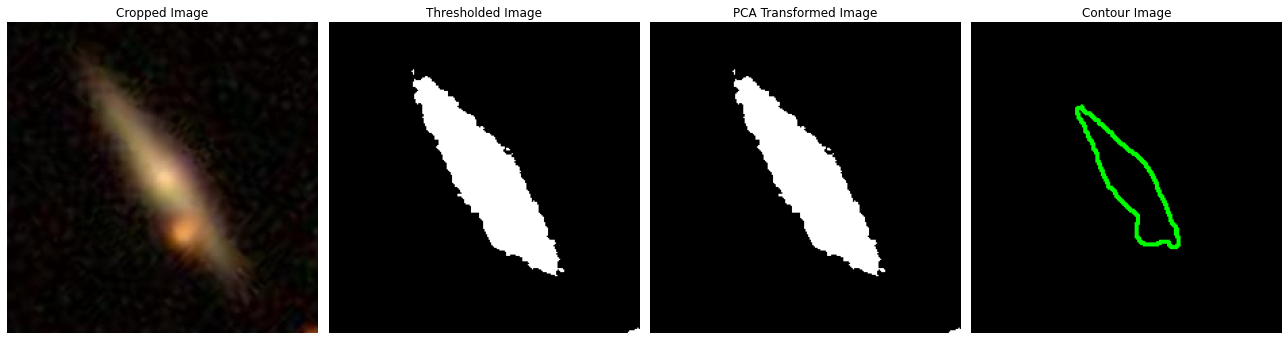

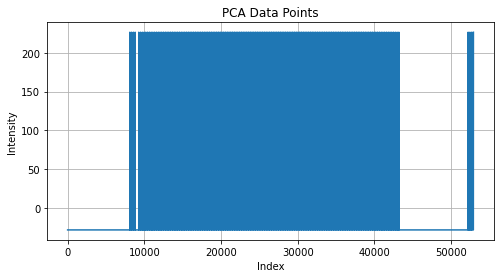

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# crop images to focus on the center
def crop_center(image, crop_size):
    height, width = image.shape[:2]
    start_h = height // 2 - crop_size // 2
    start_w = width // 2 - crop_size // 2
    return image[start_h:start_h+crop_size, start_w:start_w+crop_size]

# preprocess image
def preprocess_image(img, crop_size=230, threshold_level=100):
    # Crop the image to focus on the center
    img = crop_center(img, crop_size)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to create a binary image (dark pixels become white)
    _, thresh = cv2.threshold(gray, threshold_level, 250, cv2.THRESH_BINARY)
    
    return thresh

# extract shape features
def extract_shape_features(binary_image):
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize lists to store shape features
    areas = []
    perimeters = []
    aspect_ratios = []
    solidities = []
    
    # shape features for each contour
    for contour in contours:
        # Calculate area
        area = cv2.contourArea(contour)
        areas.append(area)
        
        # perimeter
        perimeter = cv2.arcLength(contour, True)
        perimeters.append(perimeter)
        
        #  aspect ratio
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h if h != 0 else 0  # Avoid division by zero
        aspect_ratios.append(aspect_ratio)
        
        # solidity
        solidity = area / (w * h) if (w * h) != 0 else 0  # Avoid division by zero
        solidities.append(solidity)
    
    #  numpy arrays
    areas = np.array(areas)
    perimeters = np.array(perimeters)
    aspect_ratios = np.array(aspect_ratios)
    solidities = np.array(solidities)
    
    # Stack shape features
    shape_features = np.column_stack((areas, perimeters, aspect_ratios, solidities))
    
    return shape_features

# Load the image
image_path = '97537.jpg' 
img = cv2.imread(image_path)

# Preprocess the image
binary_image = preprocess_image(img)

# Extract shape features
_ = extract_shape_features(binary_image)

# Crop the image to focus on the center
crop_size = 230  
height, width = img.shape[:2]
start_h = height // 2 - crop_size // 2
start_w = width // 2 - crop_size // 2
end_h = start_h + crop_size
end_w = start_w + crop_size
cropped_img = img[start_h:end_h, start_w:end_w]

# Convert cropped image to grayscale
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Apply threshold 
threshold_level = 50  #control the threshold
_, thresh = cv2.threshold(gray, threshold_level, 255, cv2.THRESH_BINARY)

# Apply PCA
pca = PCA(n_components=1)  
flat_thresh = thresh.flatten().reshape(-1, 1)  # Flatten the thresholded image
pca_result = pca.fit_transform(flat_thresh)

# Reshape 
pca_image = pca_result.reshape(thresh.shape)

# Flatten
pca_data_points = pca_image.flatten()

# Display 
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(pca_image, cmap='gray')
plt.title('PCA Transformed Image')
plt.axis('off')


contour_canvas = np.zeros_like(cropped_img)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(contour_canvas, contours, -1, (0, 255, 0), 2)

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contour Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display PCA 
plt.figure(figsize=(8, 4))
plt.plot(pca_data_points)
plt.title('PCA Data Points')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


### Different image

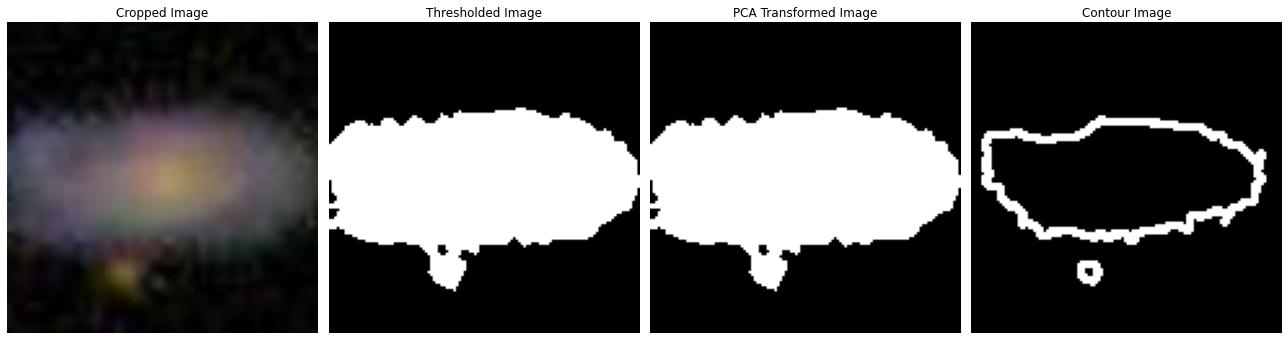

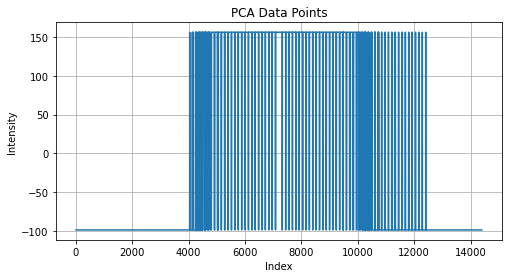

In [190]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to crop images to focus on the center
def crop_center(image, crop_size):
    height, width = image.shape[:2]
    start_h = height // 2 - crop_size // 2
    start_w = width // 2 - crop_size // 2
    return image[start_h:start_h+crop_size, start_w:start_w+crop_size]

# Function to preprocess image
def preprocess_image(img, crop_size=120, threshold_level=75):
    # Crop the image to focus on the center
    img = crop_center(img, crop_size)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to create a binary image (dark pixels become white)
    _, thresh = cv2.threshold(gray, threshold_level, 250, cv2.THRESH_BINARY)
    
    return thresh

# Load the image
image_path = '97752.jpg'  
img = cv2.imread(image_path)

# Preprocess the image
binary_image = preprocess_image(img)

# Extract shape features
_ = extract_shape_features(binary_image)

# Crop the image to focus on the center
crop_size = 120  
height, width = img.shape[:2]
start_h = height // 2 - crop_size // 2
start_w = width // 2 - crop_size // 2
end_h = start_h + crop_size
end_w = start_w + crop_size
cropped_img = img[start_h:end_h, start_w:end_w]

# Convert cropped image to grayscale
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Apply threshold to create a binary image (dark pixels become white)
threshold_level = 50  # Adjust this value to control the threshold
_, thresh = cv2.threshold(gray, threshold_level, 255, cv2.THRESH_BINARY)

# Apply PCA
pca = PCA(n_components=1) 
flat_thresh = thresh.flatten().reshape(-1, 1)  # Flatten the thresholded image
pca_result = pca.fit_transform(flat_thresh)

# Reshape
pca_image = pca_result.reshape(thresh.shape)

# Flatten 
pca_data_points = pca_image.flatten()

# Display 
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(pca_image, cmap='gray')
plt.title('PCA Transformed Image')
plt.axis('off')

# Create a blank canvas for drawing contours
contour_canvas = np.zeros_like(cropped_img)

# Find contours and draw them on the canvas
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(contour_canvas, contours, -1, (255, 255, 255), thickness=2)  # Draw contour lines only

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contour Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display PCA data points
plt.figure(figsize=(8, 4))
plt.plot(pca_data_points)
plt.title('PCA Data Points')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


### Preprocessed image with contour mask

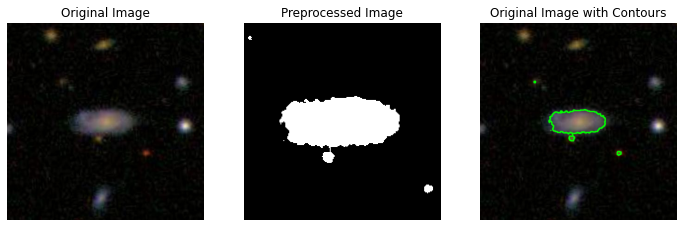

In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to crop images to focus on the center
def crop_center(image, crop_size):
    height, width = image.shape[:2]
    start_h = height // 2 - crop_size // 2
    start_w = width // 2 - crop_size // 2
    return image[start_h:start_h+crop_size, start_w:start_w+crop_size], start_h, start_w

# Preprocess the image 
def preprocess_image(img, crop_size=200, threshold_level=58):
    # Crop the image to focus on the center
    img, start_h, start_w = crop_center(img, crop_size)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # threshold 
    _, thresh = cv2.threshold(gray, threshold_level, 255, cv2.THRESH_BINARY)
    
    return thresh, start_h, start_w

# Load the image
image_path = '97752.jpg'
image = cv2.imread(image_path)

# Preprocess the image
preprocessed_img, start_h, start_w = preprocess_image(image)

# Detect contours
contours, _ = cv2.findContours(preprocessed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image 
contour_image = image.copy()  # Create a copy of the original image
for contour in contours:
    # contour coordinates
    contour[:, 0, 0] += start_w
    contour[:, 0, 1] += start_h
    
    # Draw contour on the original image
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

# Visualize results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(preprocessed_img, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contours')
plt.axis('off')

plt.show()



### Clustering code

  0% (13 of 10000) |                     | Elapsed Time: 0:00:00 ETA:   0:01:21

Number of batches: 13


100% (10000 of 10000) |##################| Elapsed Time: 0:01:53 Time:  0:01:53
100% (10000 of 10000) |##################| Elapsed Time: 0:02:04 Time:  0:02:04
100% (10000 of 10000) |##################| Elapsed Time: 0:02:06 Time:  0:02:06
100% (10000 of 10000) |##################| Elapsed Time: 0:02:08 Time:  0:02:08
100% (10000 of 10000) |##################| Elapsed Time: 0:02:32 Time:  0:02:32
100% (10000 of 10000) |##################| Elapsed Time: 0:02:39 Time:  0:02:39
100% (10000 of 10000) |##################| Elapsed Time: 0:02:38 Time:  0:02:38
100% (10000 of 10000) |##################| Elapsed Time: 0:02:32 Time:  0:02:32
100% (10000 of 10000) |##################| Elapsed Time: 0:02:33 Time:  0:02:33
100% (10000 of 10000) |##################| Elapsed Time: 0:02:33 Time:  0:02:33
100% (10000 of 10000) |##################| Elapsed Time: 0:02:32 Time:  0:02:32
100% (10000 of 10000) |##################| Elapsed Time: 0:02:35 Time:  0:02:35
100% (58 of 58) |#######################

WCSS: 3244074059.350774
Silhouette Score for Shape Clustering: 0.49206694641977466


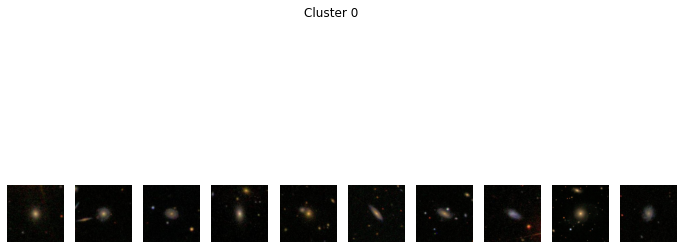

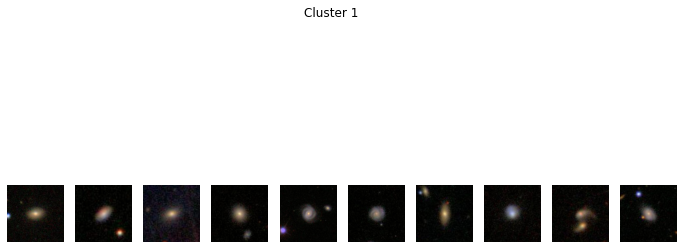

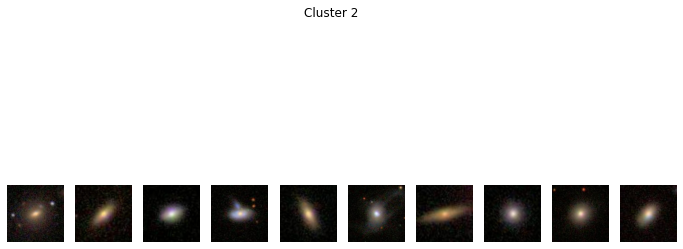

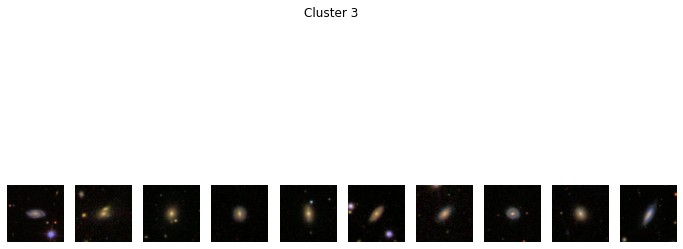

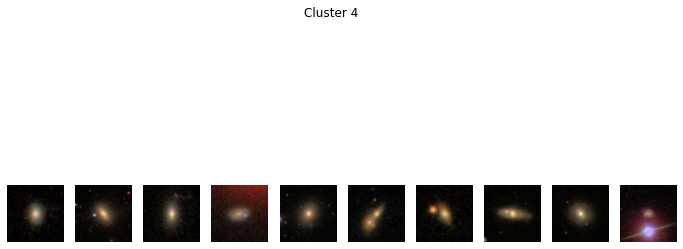

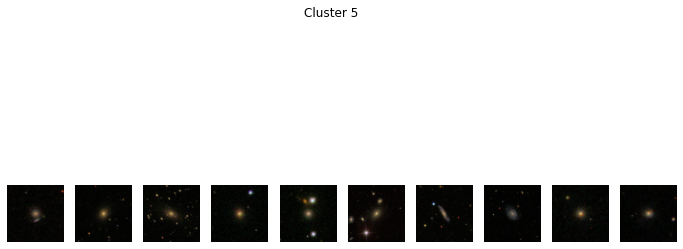

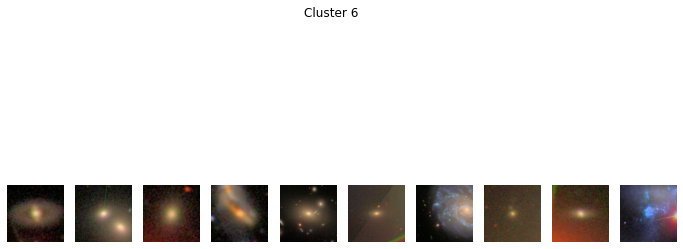

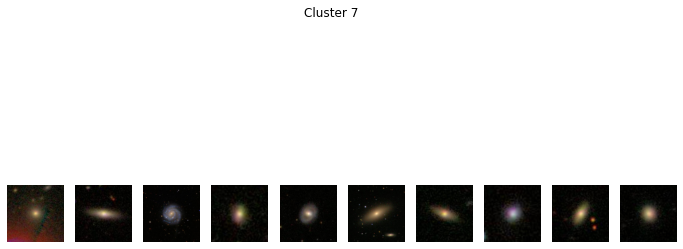

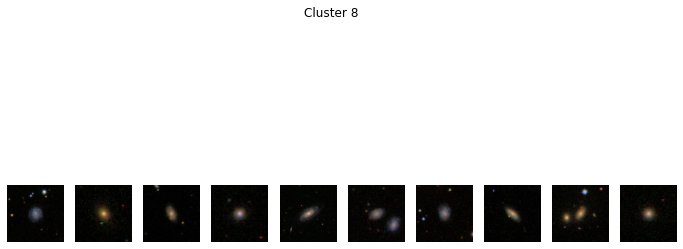

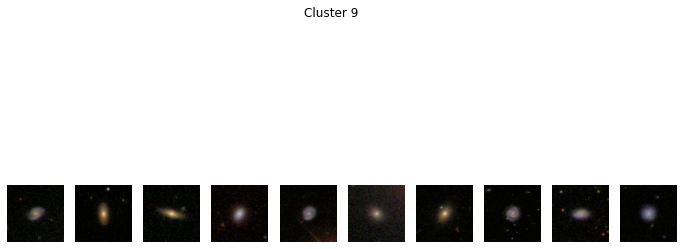

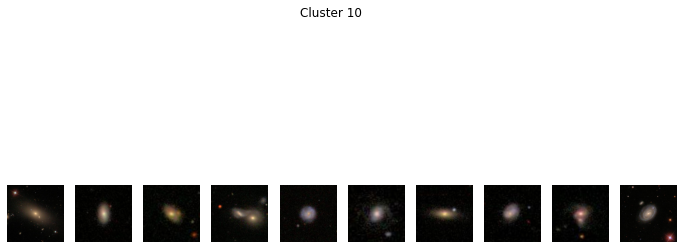

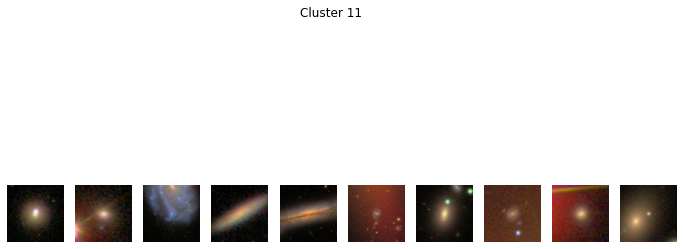

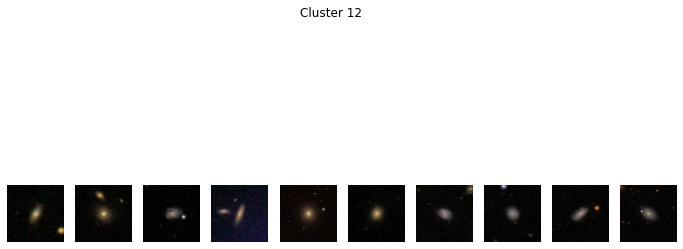

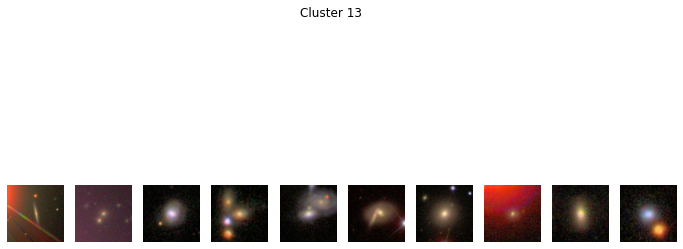

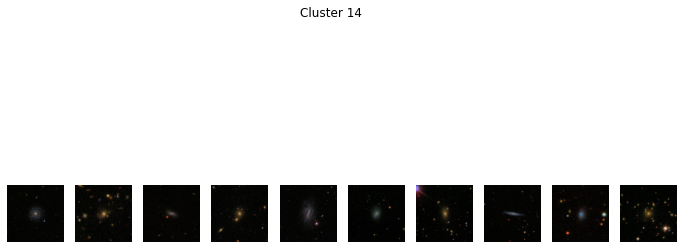

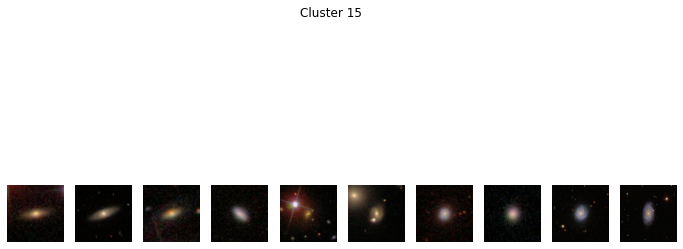

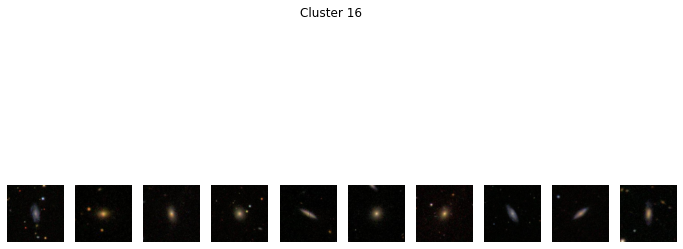

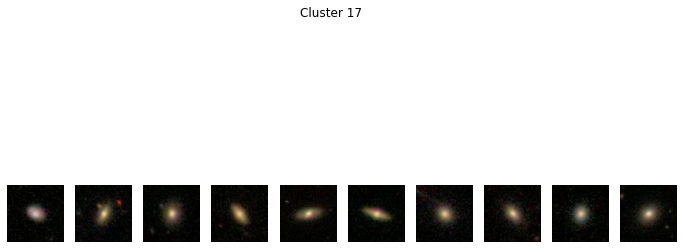

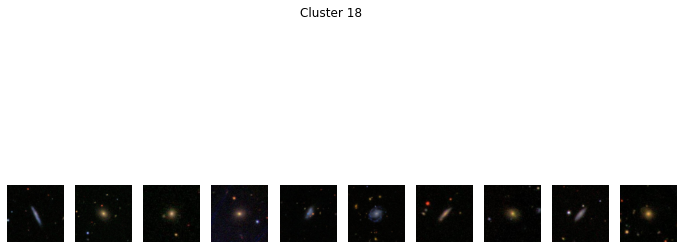

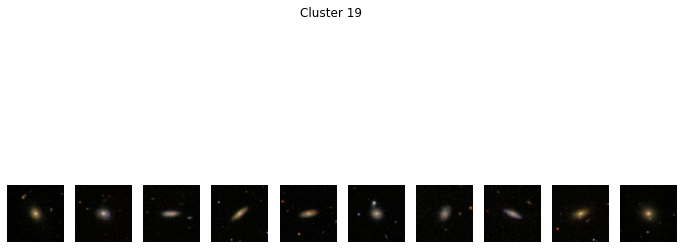

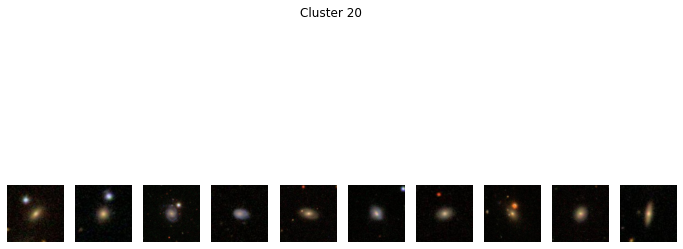

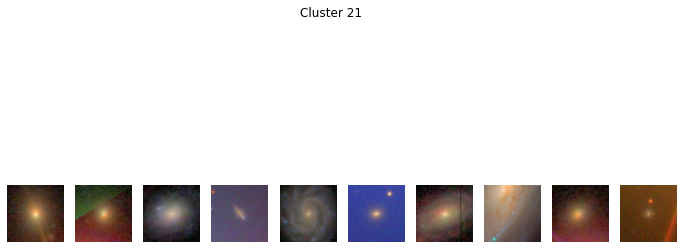

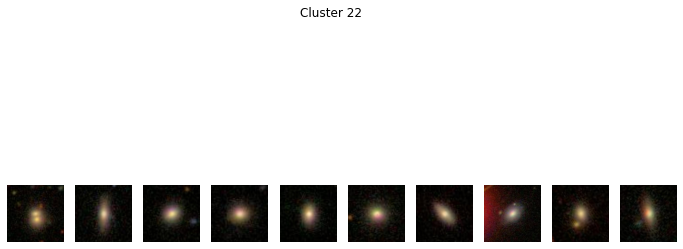

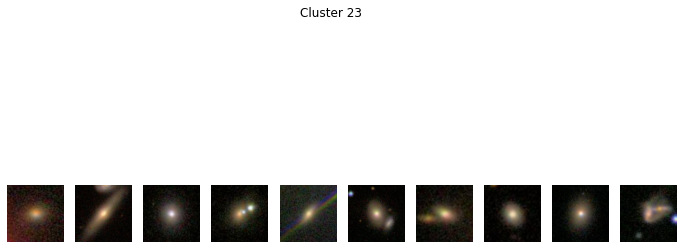

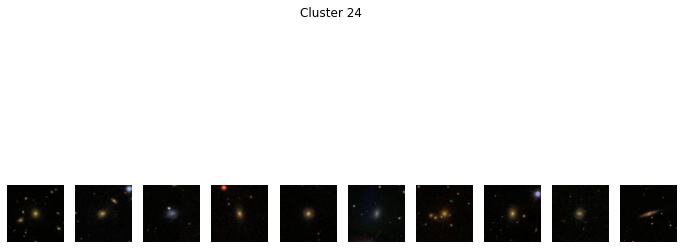

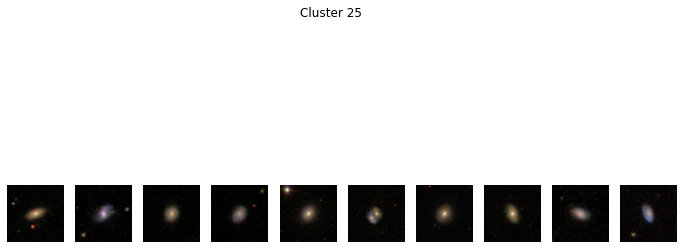

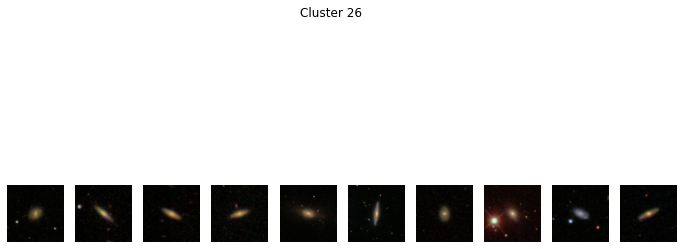

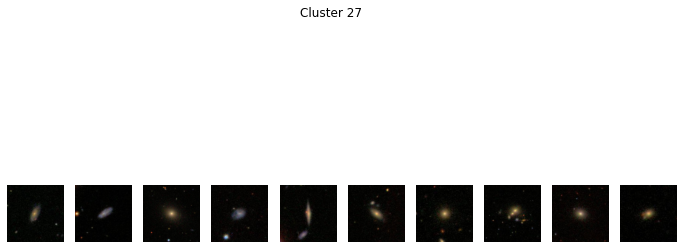

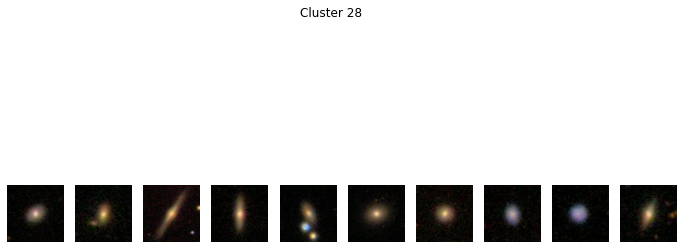

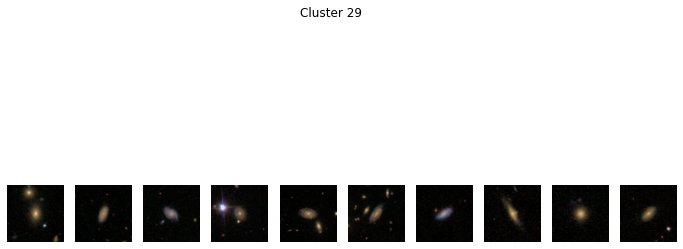

Number of images in each cluster:
0     8440
27    8361
19    8138
8     8095
16    7996
26    7740
12    7404
18    6963
29    6853
3     6344
5     6294
20    5976
9     5130
24    4991
25    4275
1     3609
15    2776
14    2731
10    2146
7     1760
17    1410
28     954
4      622
22     410
2      265
23     159
13      74
11      56
21      52
6       34
Name: shape_cluster_label, dtype: int64


In [214]:
import os
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import random
import cv2
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import progressbar

#Functions-----------------------------------------------------------------------------------------------------------------

# Function to crop images to focus on the center
def crop_center(image, crop_size):
    height, width = image.shape[:2]
    start_h = height // 2 - crop_size // 2
    start_w = width // 2 - crop_size // 2
    return image[start_h:start_h+crop_size, start_w:start_w+crop_size]

def preprocess_image(img, crop_size=200, threshold_level=58, blur_kernel_size=(5, 5), blur_sigmaX=0):
    # Crop the image 
    img = crop_center(img, crop_size)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, blur_kernel_size, blur_sigmaX)
    
    # Apply threshold to create a binary image (dark pixels become white)
    _, thresh = cv2.threshold(blurred, threshold_level, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask to keep only the largest contour
    mask = np.zeros_like(thresh)
    cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
    
    # Apply the mask to the binary image to keep only the largest contour
    masked_image = cv2.bitwise_and(thresh, thresh, mask=mask)
    
    return masked_image


# Function to extract shape features
def extract_shape_features(binary_image):
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # lists
    areas = []
    perimeters = []
    aspect_ratios = []
    solidities = []
    
    # shape features 
    for contour in contours:
        #  area
        area = cv2.contourArea(contour)
        areas.append(area)
        
        # perimeter
        perimeter = cv2.arcLength(contour, True)
        perimeters.append(perimeter)
        
        # aspect ratio
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h if h != 0 else 0  
        aspect_ratios.append(aspect_ratio)
        
        # Calculate solidity
        solidity = area / (w * h) if (w * h) != 0 else 0  
        solidities.append(solidity)
    
    # Convert lists to numpy arrays
    areas = np.array(areas)
    perimeters = np.array(perimeters)
    aspect_ratios = np.array(aspect_ratios)
    solidities = np.array(solidities)
    
    # Stack shape features horizontally
    shape_features = np.column_stack((areas, perimeters, aspect_ratios, solidities))
    
    return shape_features

# Function to calculate within-cluster sum of squares (WCSS)
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# Load unlabelled images 
images_dir = 'C:/Users/User/Downloads/archive (10)/images_gz2/images'
image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith('.jpg')]
# Shuffle the list of image files
random.shuffle(image_files)
# Custom selection of number of images by division
image_files = image_files[:len(image_files)//2]
# Number of clusters
n_clusters =30  
# Initialize lists to store features and file paths
all_shape_features = []
all_file_paths = []




#Batch stuff--------------------------------------------------------------------------------------------------------------



# Batch processing
batch_size = 10000
num_batches = len(image_files) // batch_size + (1 if len(image_files) % batch_size != 0 else 0)
print("Number of batches:", num_batches)

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(image_files))
    batch_files = image_files[start_index:end_index]
    
    # Extract shape features and preprocess images for the current batch
    shape_features_batch = []
    file_paths_batch = []
    progress_bar = progressbar.ProgressBar(max_value=len(batch_files))
    for j, file in enumerate(batch_files):
        progress_bar.update(j)
        
        img = cv2.imread(file)
        preprocessed_img = preprocess_image(img)
        shape_features = extract_shape_features(preprocessed_img)
        shape_features_batch.extend(shape_features)
        
        # Repeat the file path
        file_paths_batch.extend([file] * len(shape_features))
    
    progress_bar.finish()
        
    all_shape_features.extend(shape_features_batch)
    all_file_paths.extend(file_paths_batch)

    
# Convert lists to numpy arrays
shape_features_np = np.array(all_shape_features)

# KMeans clustering 
kmeans = KMeans(n_clusters=n_clusters)
shape_cluster_labels = kmeans.fit_predict(shape_features_np)

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Calculate WCSS
wcss = calculate_wcss(shape_features_np, centroids, shape_cluster_labels)
print("WCSS:", wcss)

# Create DataFrame 
df = pd.DataFrame({
    'file_path': all_file_paths,
    'shape_cluster_label': shape_cluster_labels
})


# Save the DataFrame to a CSV file
df.to_csv('New_dataset_with_shape_clusters(2).csv', index=False)





#Evaluation stuff---------------------------------------------------------------------------------------------------------



# Compute silhouette score for shape clustering
silhouette_shape = silhouette_score(shape_features_np, shape_cluster_labels)
print("Silhouette Score for Shape Clustering:", silhouette_shape)

# Randomly select images from each cluster for visualization
num_images_per_cluster = 10  # Number of images to display from each cluster
for cluster_label in range(n_clusters):
    cluster_df = df[df['shape_cluster_label'] == cluster_label]
    cluster_samples = cluster_df.sample(min(num_images_per_cluster, len(cluster_df)))
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Cluster {cluster_label}")
    for i, (_, row) in enumerate(cluster_samples.iterrows(), 1):
        img = cv2.imread(row['file_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, num_images_per_cluster, i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


# Number of images in each cluster
cluster_counts = df['shape_cluster_label'].value_counts()

# Print the number of images in each cluster
print("Number of images in each cluster:")
print(cluster_counts)




### Clustering extra evalutaion metrics

In [238]:
#Store
cluster_shape_features_mean = {}
cluster_shape_features_median = {}
cluster_shape_features_std = {}

# mean, median, and standard deviation 
for cluster_label in range(n_clusters):
    cluster_features = shape_features_np[shape_cluster_labels == cluster_label]
    cluster_shape_features_mean[cluster_label] = np.mean(cluster_features, axis=0)
    cluster_shape_features_median[cluster_label] = np.median(cluster_features, axis=0)
    cluster_shape_features_std[cluster_label] = np.std(cluster_features, axis=0)

# Print
for cluster_label in range(n_clusters):
    print(f"\nCluster {cluster_label}:")
    print("  - Mean Shape Features:")
    print("    - Area: {:.2f}".format(cluster_shape_features_mean[cluster_label][0]))
    print("    - Perimeter: {:.2f}".format(cluster_shape_features_mean[cluster_label][1]))
    print("    - Aspect Ratio: {:.2f}".format(cluster_shape_features_mean[cluster_label][2]))
    print("    - Solidity: {:.2f}".format(cluster_shape_features_mean[cluster_label][3]))
    
    print("  - Median Shape Features:")
    print("    - Area: {:.2f}".format(cluster_shape_features_median[cluster_label][0]))
    print("    - Perimeter: {:.2f}".format(cluster_shape_features_median[cluster_label][1]))
    print("    - Aspect Ratio: {:.2f}".format(cluster_shape_features_median[cluster_label][2]))
    print("    - Solidity: {:.2f}".format(cluster_shape_features_median[cluster_label][3]))
    
    print("  - Standard Deviation Shape Features:")
    print("    - Area: {:.2f}".format(cluster_shape_features_std[cluster_label][0]))
    print("    - Perimeter: {:.2f}".format(cluster_shape_features_std[cluster_label][1]))
    print("    - Aspect Ratio: {:.2f}".format(cluster_shape_features_std[cluster_label][2]))
    print("    - Solidity: {:.2f}".format(cluster_shape_features_std[cluster_label][3]))



Cluster 0:
  - Mean Shape Features:
    - Area: 3296.20
    - Perimeter: 278.09
    - Aspect Ratio: 1.09
    - Solidity: 0.62
  - Median Shape Features:
    - Area: 3297.50
    - Perimeter: 272.01
    - Aspect Ratio: 1.00
    - Solidity: 0.64
  - Standard Deviation Shape Features:
    - Area: 110.60
    - Perimeter: 32.59
    - Aspect Ratio: 0.51
    - Solidity: 0.09

Cluster 1:
  - Mean Shape Features:
    - Area: 7991.22
    - Perimeter: 417.67
    - Aspect Ratio: 1.04
    - Solidity: 0.66
  - Median Shape Features:
    - Area: 7981.50
    - Perimeter: 403.20
    - Aspect Ratio: 1.00
    - Solidity: 0.68
  - Standard Deviation Shape Features:
    - Area: 177.75
    - Perimeter: 57.10
    - Aspect Ratio: 0.34
    - Solidity: 0.07

Cluster 2:
  - Mean Shape Features:
    - Area: 16867.54
    - Perimeter: 670.18
    - Aspect Ratio: 1.00
    - Solidity: 0.66
  - Median Shape Features:
    - Area: 16802.50
    - Perimeter: 648.74
    - Aspect Ratio: 0.97
    - Solidity: 0.67
  - Standard

### Cluster viewing

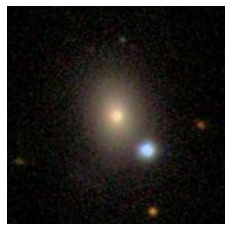

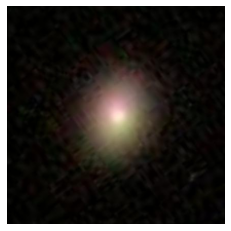

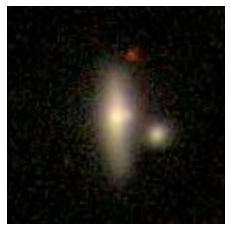

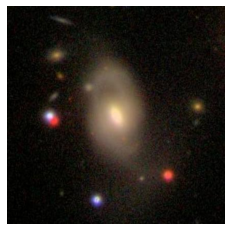

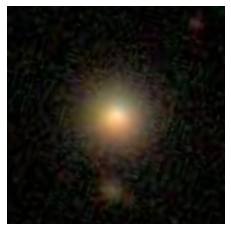

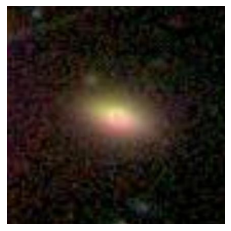

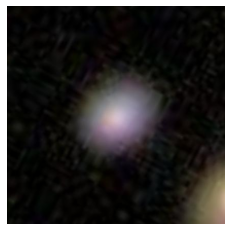

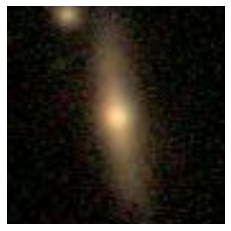

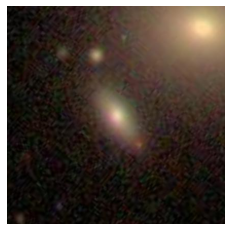

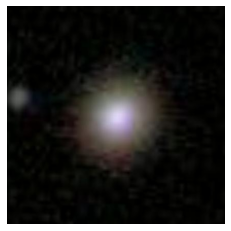

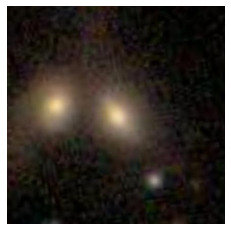

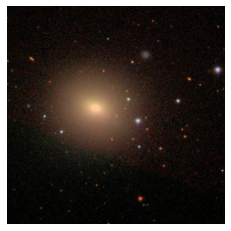

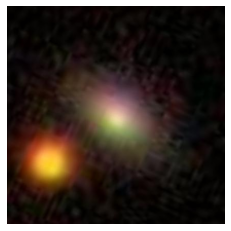

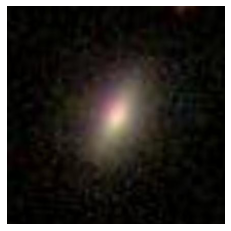

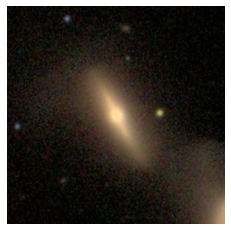

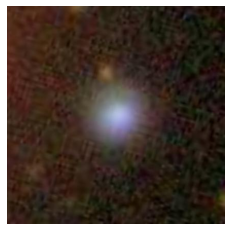

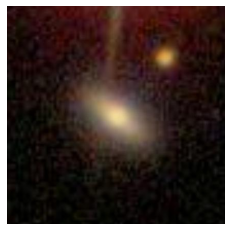

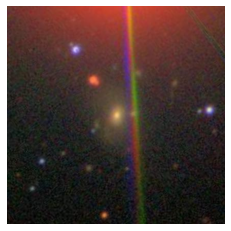

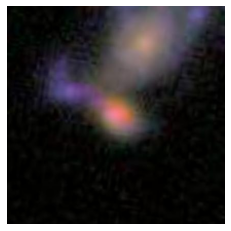

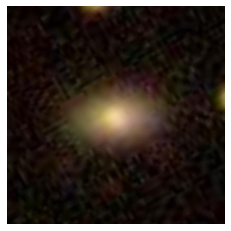

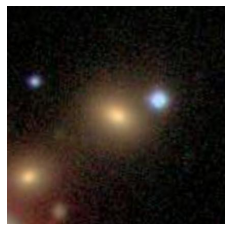

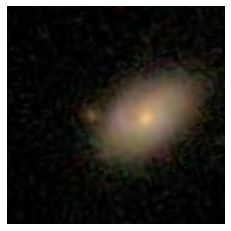

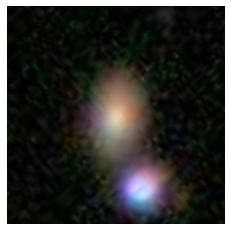

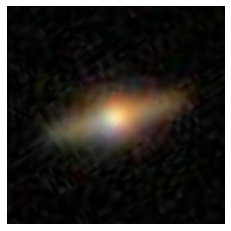

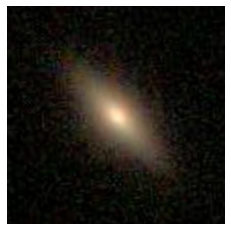

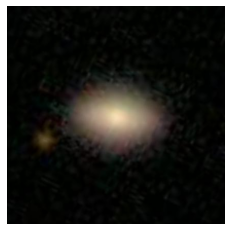

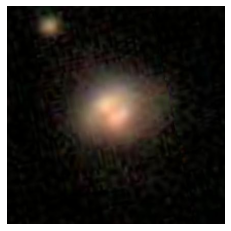

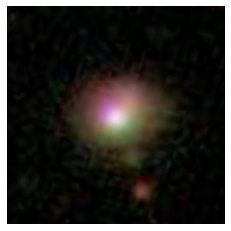

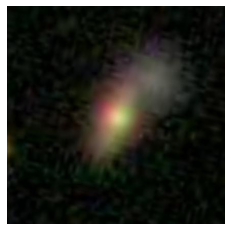

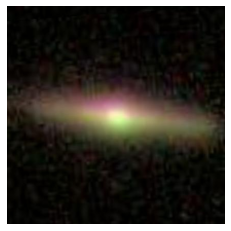

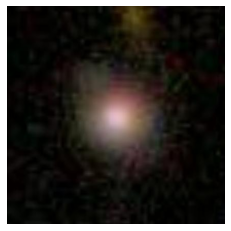

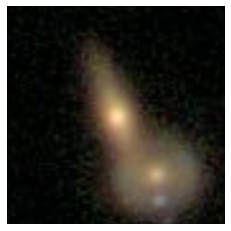

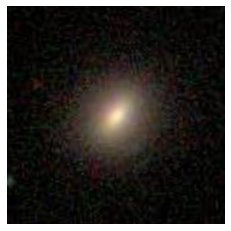

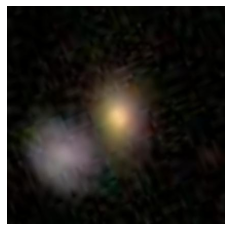

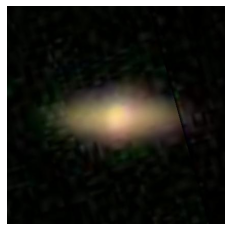

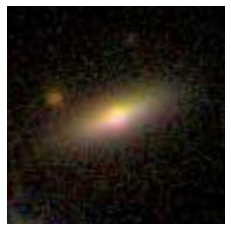

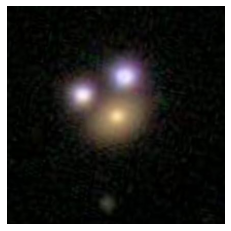

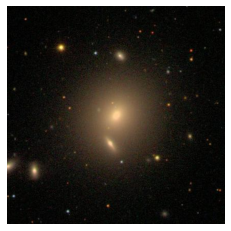

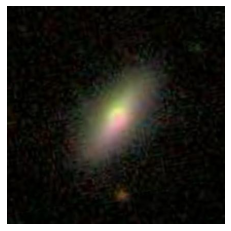

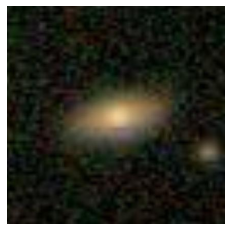

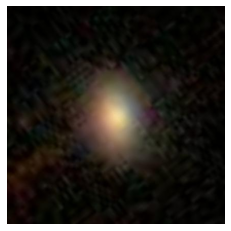

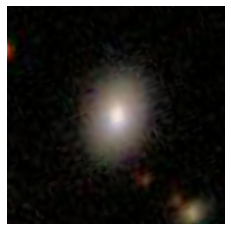

KeyboardInterrupt: 

In [232]:

cluster_label_to_view = 2  
cluster_df = df[df['shape_cluster_label'] == cluster_label_to_view]
for _, row in cluster_df.iterrows():
    
    img = cv2.imread(row['file_path'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



# Manual Labelling

In [188]:
import pandas as pd


df = pd.read_csv('New_dataset_with_shape_clusters.csv')

# Define the mapping 
label_mapping = {
    1: 'Round', 2: 'Round', 12: 'Round', 18: 'Round', 16: 'Round',
    27: 'In-between round', 25: 'In-between round', 20: 'In-between round',
    19: 'In-between round', 17: 'In-between round', 11: 'In-between round',
    9: 'In-between round', 8: 'In-between round', 7: 'In-between round',
    6: 'In-between round', 4: 'In-between round',
    29: 'Disk', 28: 'Disk', 23: 'Disk', 15: 'Disk'
}

# Update the shape_cluster_label column based on the label_mapping
df['shape_cluster_label'] = df['shape_cluster_label'].map(label_mapping)

# Remove rows corresponding to the following numbers
skipped_clusters = [0, 3, 5, 10, 13, 14, 21, 22, 24, 26]
df = df[~df['shape_cluster_label'].isna() | ~df['shape_cluster_label'].isin(skipped_clusters)]

# Remove the word "Cluster" from the labels
df['shape_cluster_label'] = df['shape_cluster_label'].str.replace('Cluster ', '')

# Save to new CSV file
df.to_csv('Manually_Labelled_Dataset.csv', index=False)





### Droping images with no label assigned

In [201]:
import pandas as pd

df = pd.read_csv('Manually_Labelled_Dataset.csv')

# Remove rows with blank labels
df = df.dropna(subset=['shape_cluster_label'])

df.to_csv('Manually_Labelled_Dataset.csv', index=False)


### Calculating rgb averages

In [1]:
import cv2
import pandas as pd
from tqdm import tqdm


df = pd.read_csv('Manually_Labelled_Dataset.csv')

# mean RGB value of an image
def calculate_mean_rgb(image_path):
    
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mean_rgb = tuple(image_rgb.mean(axis=(0, 1)))
    return mean_rgb

tqdm.pandas(desc="Calculating Mean RGB")
df['mean_rgb'] = df['file_path'].progress_apply(calculate_mean_rgb)

# New CSV file
df.to_csv('New_dataset_with_mean_rgb.csv', index=False)


Calculating Mean RGB: 100%|██████████████████████████████████████████████████████| 84335/84335 [19:25<00:00, 72.38it/s]


### calculating single rgb average and saving to new csv


In [34]:
import numpy as np
import pandas as pd

# Load the CSV data
csv_path = 'New_dataset_with_mean_rgb.csv'
df = pd.read_csv(csv_path)

# mean RGB value , One value
def calculate_mean_rgb(mean_rgb_str):
    rgb_values = np.fromstring(mean_rgb_str[1:-1], sep=',')
    return np.mean(rgb_values)

# Calculate mean RGB value for each entry
df['mean_rgb'] = df['mean_rgb'].apply(calculate_mean_rgb)

# Map mean RGB values to a range between 1 and 10
min_rgb = df['mean_rgb'].min()
max_rgb = df['mean_rgb'].max()
df['mapped_age'] = 1 + ((df['mean_rgb'] - min_rgb) / (max_rgb - min_rgb)) * 9

# Save the DataFrame to a new CSV file
new_csv_path = 'New_dataset_with_mean_rgb_updated.csv'
df.to_csv(new_csv_path, index=False)

print("New CSV file saved successfully.")



New CSV file saved successfully.


### Reducing dataset size and saving to new csv

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load 
file_path = "New_dataset_with_mean_rgb_updated.csv"
data = pd.read_csv(file_path)

# Specify the column containing class labels
class_labels = data['shape_cluster_label']

# Calculate the ratio of the desired number of samples to the original dataset size
desired_samples = 20000
reduced_ratio = desired_samples / len(data)

# stratified sampling with calculated ratio
X_train, X_reduced, y_train, y_reduced = train_test_split(data, class_labels, test_size=reduced_ratio, stratify=class_labels)

# Display 
print("Shape of reduced dataset:", X_reduced.shape)

# new CSV file
X_reduced.to_csv("reduced_dataset.csv", index=False)



Shape of reduced dataset: (20000, 4)


### Balancing the dataset

In [155]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
data = pd.read_csv("reduced_dataset2.csv")

# Check the class distribution
class_distribution = data['shape_cluster_label'].value_counts()
print("Class distribution before undersampling:")
print(class_distribution)

# Separate features and target variable
X = data.drop(columns=['shape_cluster_label'])
y = data['shape_cluster_label']

# Undersample to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='all')
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine the resampled features and labels into a DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['shape_cluster_label'] = y_resampled

# Check the class distribution after undersampling
class_distribution_after = balanced_data['shape_cluster_label'].value_counts()
print("\nClass distribution after undersampling:")
print(class_distribution_after)

# Save the balanced dataset to a new CSV file
balanced_data.to_csv("balanced_dataset.csv", index=False)



Class distribution before undersampling:
In-between round    12161
Round                5890
Disk                 1949
Name: shape_cluster_label, dtype: int64

Class distribution after undersampling:
Disk                1949
In-between round    1949
Round               1949
Name: shape_cluster_label, dtype: int64


# Keras functional API

### calculating the baselines for model to beat

In [249]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load data from CSV
data = pd.read_csv("balanced_dataset.csv")

# Preprocess data
y_shape_label = data['shape_cluster_label']
y_age = data['mapped_age']

# Majority Class Baseline for Shape Labels
majority_class = y_shape_label.mode().iloc[0]
y_shape_pred_majority = [majority_class] * len(y_shape_label)
accuracy_shape_majority = accuracy_score(y_shape_label, y_shape_pred_majority)
print("Accuracy for Majority Class Baseline (Shape Labels):", accuracy_shape_majority)

# Mean Baseline for Age Prediction
mean_age = y_age.mean()
y_age_pred_mean = [mean_age] * len(y_age)
mae_age_mean = mean_absolute_error(y_age, y_age_pred_mean)
print("Mean Absolute Error for Mean Baseline (Age Prediction):", mae_age_mean)


Accuracy for Majority Class Baseline (Shape Labels): 0.3333333333333333
Mean Absolute Error for Mean Baseline (Age Prediction): 0.45385066286434517


### Functional api (Model)

In [221]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization


# Load data from CSV
data = pd.read_csv("balanced_dataset.csv")

# Preprocess data
X_file_path = data['file_path']
y_shape_label = data['shape_cluster_label']
y_age = data['mapped_age']

# Encode shape label using LabelEncoder
shape_encoder = LabelEncoder()
y_shape_label_encoded = shape_encoder.fit_transform(y_shape_label)

# Normalize age
age_scaler = MinMaxScaler()
y_age_normalized = age_scaler.fit_transform(y_age.values.reshape(-1, 1))

# Train-test split
X_train, X_val, y_shape_train, y_shape_val, y_age_train, y_age_val = train_test_split(
    X_file_path, y_shape_label_encoded, y_age_normalized, test_size=0.2, random_state=42)

# load and preprocess images
def preprocess_image(file_paths):
    images = []
    for file_path in file_paths:
        # Load image
        image = cv2.imread(file_path)
        # Resize image
        image = cv2.resize(image, (64, 64))
        # Normalize pixel values to range [0, 1]
        image = image.astype('float32') / 255.0
        # Append to list of images
        images.append(image)
    return np.array(images)

# Preprocess training and validation images
X_train = preprocess_image(X_train)
X_val = preprocess_image(X_val)

# Define input layer
input_img = Input(shape=(64, 64, 3), name='image_input')

# Convolutional base
conv1 = Conv2D(64, (2, 2), activation='relu', kernel_regularizer=l2(0.01))(input_img)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Inception module
conv3 = Conv2D(32, (1, 1), activation='relu', padding='same', kernel_regularizer=l2(0.01))(pool1)
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(pool1)
conv5 = Conv2D(32, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.01))(pool1)
pool3 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(pool1)
conv6 = Conv2D(32, (1, 1), activation='relu', padding='same', kernel_regularizer=l2(0.01))(pool3)

concat = concatenate([conv3, conv4, conv5, conv6], axis=-1)

flatten = Flatten()(concat)

# Dropout layer 1
dropout1 = Dropout(0.5)(flatten)

# Fully connected layers for shape label prediction
dense_shape1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(dense_shape1)  # Dropout layer 2
dense_shape2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(dropout2)
# Output layer for shape label
output_shape = Dense(3, activation='softmax', name='output_shape')(dense_shape2)  

# Dropout layer 3
dropout3 = Dropout(0.5)(flatten)

# Fully connected layers for age prediction
dense_age1 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(dropout2)
dense_age2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(dense_age1)
# Output layer for age prediction
output_age = Dense(1, activation='linear', name='output_age')(dense_age2)  

# Define the model
model = Model(inputs=input_img, outputs=[output_shape, output_age])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss={'output_shape': 'sparse_categorical_crossentropy', 'output_age': 'mse'},
              metrics={'output_shape': 'accuracy', 'output_age': 'mae'})

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, {'output_shape': y_shape_train, 'output_age': y_age_train},
    validation_data=(X_val, {'output_shape': y_shape_val, 'output_age': y_age_val}),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)



Model: "model_127"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_516 (Conv2D)            (None, 63, 63, 64)   832         ['image_input[0][0]']            
                                                                                                  
 batch_normalization_145 (Batch  (None, 63, 63, 64)  256         ['conv2d_516[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d_233 (MaxPooling2  (None, 31, 31, 64)  0           ['batch_normalization_145

### checking balancing 

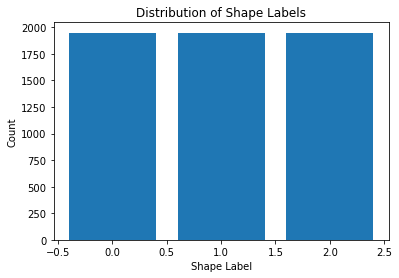

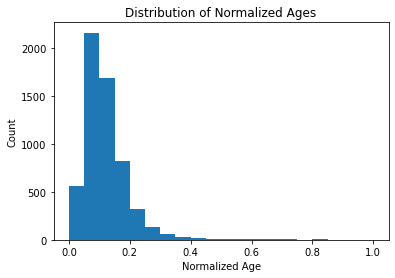

In [244]:

import matplotlib.pyplot as plt

# Check the distribution of shape labels
shape_label_counts = pd.Series(y_shape_label_encoded).value_counts()
plt.bar(shape_label_counts.index, shape_label_counts.values)
plt.xlabel('Shape Label')
plt.ylabel('Count')
plt.title('Distribution of Shape Labels')
plt.show()

# Plot histogram of age distribution
plt.hist(y_age_normalized, bins=20)
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.title('Distribution of Normalized Ages')
plt.show()


### confusion matrix

In [217]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict shape labels for the validation data
y_shape_pred = model.predict(X_val)[0]

#one-hot encoding to class labels
y_shape_pred_classes = np.argmax(y_shape_pred, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_shape_val, y_shape_pred_classes)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_mat)




37/37 [==============================] - 10s 261ms/step
Confusion Matrix:
[[381  19  13]
 [ 50 314  29]
 [ 60 190 114]]


### Evaluation metrics

In [218]:
# precision, recall and F1-score 
class_report = classification_report(y_shape_val, y_shape_pred_classes, target_names=shape_encoder.classes_)

print("\nClassification Report:")
print(class_report)


Classification Report:
                  precision    recall  f1-score   support

            Disk       0.78      0.92      0.84       413
In-between round       0.60      0.80      0.69       393
           Round       0.73      0.31      0.44       364

        accuracy                           0.69      1170
       macro avg       0.70      0.68      0.66      1170
    weighted avg       0.70      0.69      0.66      1170



### Model testing

In [ ]:


X_test = preprocess_image(test_file_paths)

# Evaluate model
test_loss, test_accuracy, test_mae = model.evaluate(
    X_test, {'output_shape': y_shape_test, 'output_age': y_age_test}, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Shape Accuracy: {test_accuracy}")
print(f"Test Age MAE: {test_mae}")
